# Linear Regression - Project on Sample E-Commerce Dataset

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

## Imports
** Importing pandas, numpy, matplotlib,and seaborn. Setting %matplotlib inline 
**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Getting the Data

I will work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [2]:
customers = pd.read_csv('Ecommerce Customers.csv')

**Checking the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

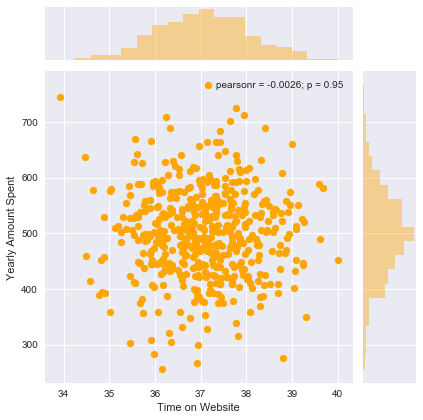

In [31]:
# Let's see the relationship of Website usage on the business.

sns.jointplot('Time on Website', 'Yearly Amount Spent', data = customers, color = 'orange')
# NO it does not seem that more the time spent on website results in more spending.

** Doing the same but with the Time on App column instead. **

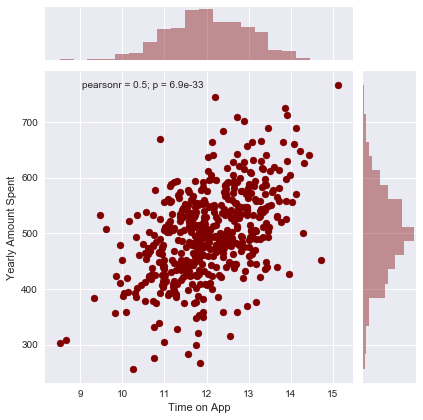

In [7]:
# Now lets see the effect of mobile usage on the business

sns.jointplot('Time on App', 'Yearly Amount Spent', data = customers, color = 'maroon')
# Yes, more time spent on the app results in more purchase.
# This is the indication that the app seems to be more advantageous for the business.

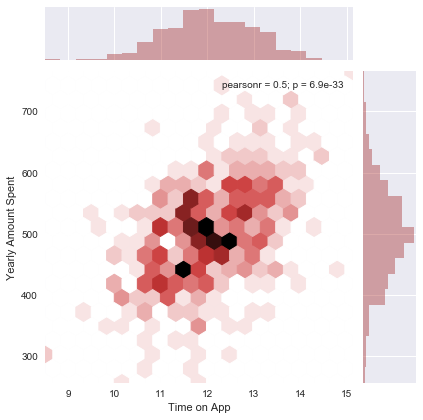

In [8]:
# Creating a 2D hex visualization to see the data better.
sns.jointplot('Time on App','Yearly Amount Spent', data = customers, kind = 'hex', color = 'brown')

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

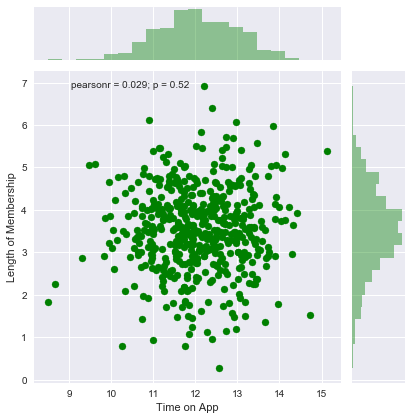

In [9]:
sns.jointplot('Time on App','Length of Membership', data = customers, color = 'green')
# There is no relation between the length of membership and the usage of mobile app
# So, it implies that it does not matter if the member is very old and loyal one or recently joined new customer for the usage of mobile app.

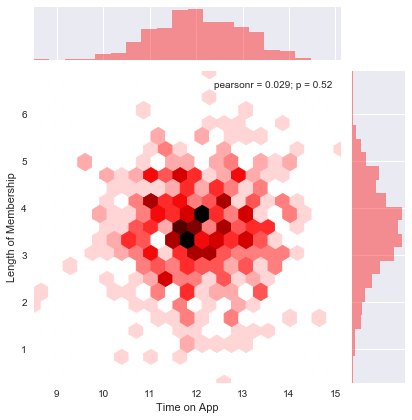

In [10]:
sns.jointplot('Time on App','Length of Membership', data = customers, kind = 'hex', color = 'red')

**Let's explore these types of relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

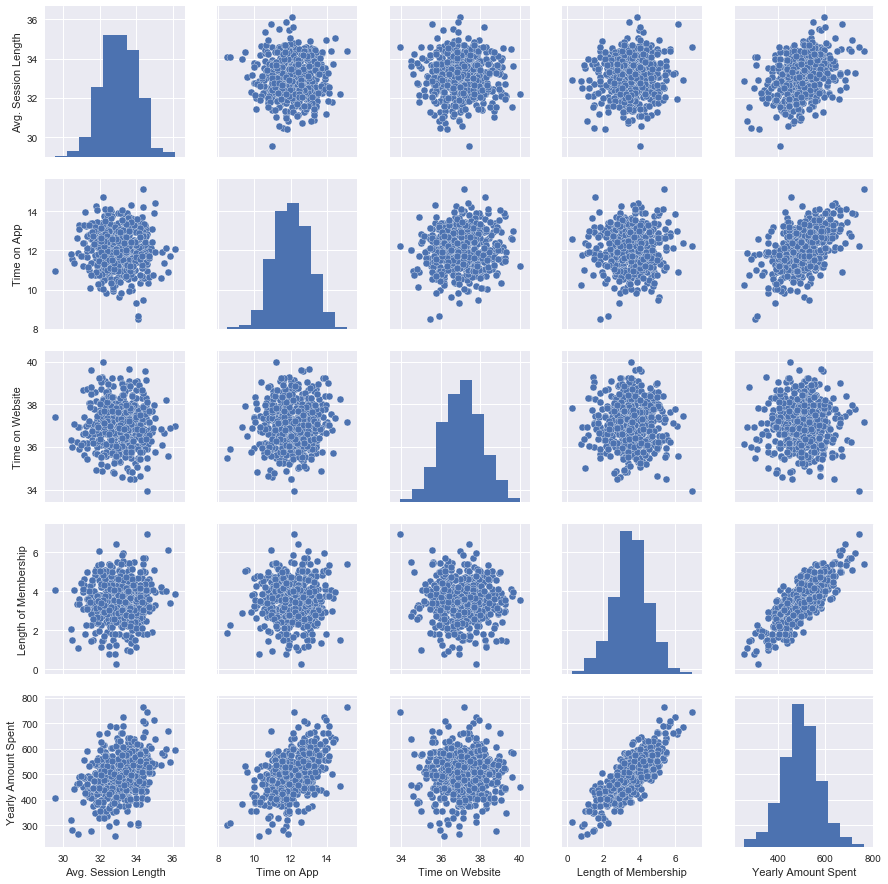

In [11]:
# So let's explore the relationship between all the varibales over the dataset to search if we can see some relevant information.
sns.pairplot(customers)

# Results shows that, these are the relevant relations.
# 1. Avg length of session >> Yearly Amount spent
# 2. Time on App >> Yearly Amount spent
# 3. Length of Membership >> Yearly Amount spent

**Based off this plot it looks line "Length of Membership" to be the most correlated feature with Yearly Amount Spent.**

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

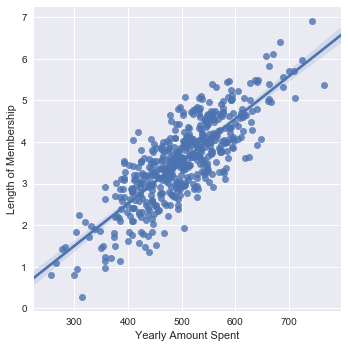

In [13]:
sns.lmplot('Yearly Amount Spent', 'Length of Membership', data = customers)

## Training and Testing Data

Now that the dad have been explored a bit, let's go ahead and split the data into training and testing sets.
** Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [14]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [18]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382


## Training the Model

Now its time to train our model on our training data!

** Importing LinearRegression from sklearn.linear_model **

In [19]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [20]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [21]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the coefficients of the model**

In [22]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [23]:
lm.intercept_

-1047.9327822502387

In [24]:
model = pd.DataFrame(lm.coef_, X_train.columns, ['Coefficient'])
model.loc['Intercept'] = lm.intercept_
model
# The model shows that, the most influencing factor is Length of Membership followed by Time on App 
# and lastly Avg Session Length. Time spent on Website is not affecting much in the sales.

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
Intercept,-1047.932782


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Using lm.predict() to predict off the X_test set of the data.**

In [25]:
predictions = lm.predict(X_test)
predictions

array([ 456.44186104,  402.72005312,  409.2531539 ,  591.4310343 ,
        590.01437275,  548.82396607,  577.59737969,  715.44428115,
        473.7893446 ,  545.9211364 ,  337.8580314 ,  500.38506697,
        552.93478041,  409.6038964 ,  765.52590754,  545.83973731,
        693.25969124,  507.32416226,  573.10533175,  573.2076631 ,
        397.44989709,  555.0985107 ,  458.19868141,  482.66899911,
        559.2655959 ,  413.00946082,  532.25727408,  377.65464817,
        535.0209653 ,  447.80070905,  595.54339577,  667.14347072,
        511.96042791,  573.30433971,  505.02260887,  565.30254655,
        460.38785393,  449.74727868,  422.87193429,  456.55615271,
        598.10493696,  449.64517443,  615.34948995,  511.88078685,
        504.37568058,  515.95249276,  568.64597718,  551.61444684,
        356.5552241 ,  464.9759817 ,  481.66007708,  534.2220025 ,
        256.28674001,  505.30810714,  520.01844434,  315.0298707 ,
        501.98080155,  387.03842642,  472.97419543,  432.87046

** Creating a scatterplot of the real test values versus the predicted values. **

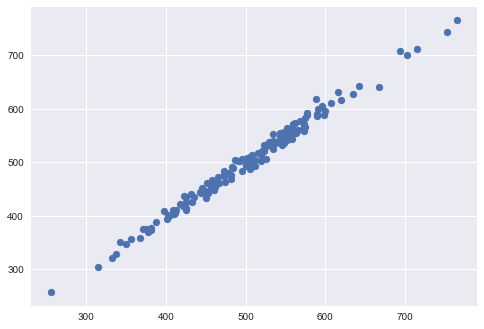

In [26]:
plt.scatter(predictions, y_test)
# the values are related linearly and therefore the selected model is correct

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [27]:
from sklearn import metrics

In [28]:
print('MAE: ', metrics.mean_absolute_error(predictions, y_test))
x = metrics.mean_squared_error(predictions, y_test)
print('MSE: ', x)
print('RMSE: ', np.sqrt(x))
print('RMSE is actually the standard deviation from the true target values')


MAE:  7.22814865343
MSE:  79.813051651
RMSE:  8.93381506698
RMSE is actually the standard deviation from the true target values


In [37]:
# The explained variance by our model is
print('R^2: ', metrics.explained_variance_score(y_test, predictions))
print('Almost 99% of the varaiance is explained by the model')

R^2:  0.989077123189
Almost 99% of the varaiance is explained by the model


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals and making sure it looks normally distributed. Using either seaborn distplot, or just plt.hist().**

C:\Users\desai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


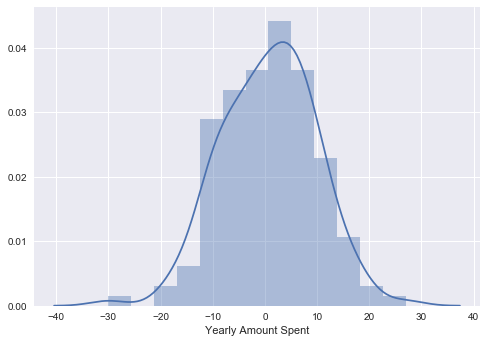

In [29]:
sns.distplot((predictions - y_test))

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreating the dataframe below. **

In [30]:
model = pd.DataFrame(lm.coef_, X_train.columns, ['Coefficient'])
model.loc['Intercept'] = lm.intercept_
model

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
Intercept,-1047.932782


** Should the company focus more on their mobile app or on their website?**

It depends on various factors including the cost and budget allocated. It seems that mobile app is working better for the business. So one way is to think that focus more on developing the App and capitalizing on it. 
Another view is that, focus on Web development so as to improve the user experience and making them to buy more.

These are the reports to be presented to the management and discuss for possible alternatives.
